В данной работе использовалась гибридная модель рекомендательной системы SVD++ и SlopeOne, где каждой рекомендательной системе был присвоен вес 0.5

In [1]:
import os
import numpy as np
import pandas as pd
from numpy import linalg
from surprise import SlopeOne
from surprise import Reader, Dataset
from surprise import SVDpp
os.chdir('/Recommendation system of films/data')

In [2]:
df = pd.read_csv('ratings.csv', delimiter=',')
df = df.drop(['timestamp'], axis=1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int64  
 1   movieId  100836 non-null  int64  
 2   rating   100836 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


In [4]:
df.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


C:\Users\dimav\.conda\envs\my-rdkit-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

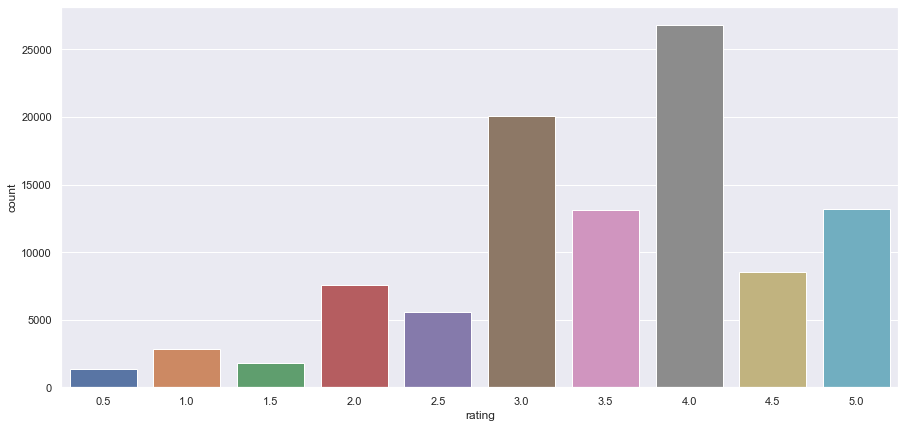

In [5]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.set(style="darkgrid")
sns.countplot(df['rating'])

In [6]:
real=df.groupby(['rating'])['userId'].count()
real=pd.DataFrame(real)
fig = px.line(real)
fig.show()

In [7]:
real=df.groupby(['rating'])['movieId'].count()
real=pd.DataFrame(real)
fig = px.line(real)
fig.show()

In [8]:
real=df.groupby(['userId'])['rating'].count()
real=pd.DataFrame(real)
fig = px.line(real)
fig.show()

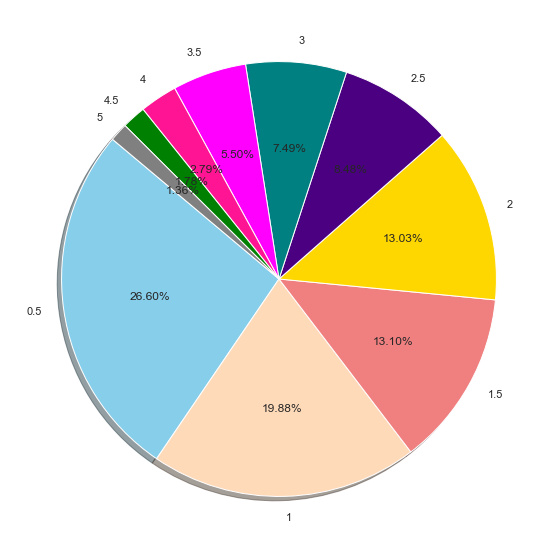

In [9]:
plt.figure(figsize=(15,10))
labels=['0.5','1','1.5','2','2.5','3','3.5','4','4.5','5']
colors = ["SkyBlue","PeachPuff",'lightcoral','gold','indigo','teal','magenta','deeppink','green','gray']
plt.pie(df['rating'].value_counts(),labels=labels,colors=colors,
        autopct='%1.2f%%', shadow=True, startangle=140) 
plt.show()

In [10]:
df['userId'] = df['userId'].astype(str)
df['movieId'] = df['movieId'].astype(str)
df['userId'] = 'person_'+df['userId'].astype(str)
df['movieId'] = 'movie_'+df['movieId'].astype(str)

In [11]:
df_new=df.copy()
df_new=df_new.rename(columns={"movieId": "userId/movieId"})

In [12]:
df_new = df_new.pivot_table(index=['userId'], columns='userId/movieId', values='rating', aggfunc=np.sum).reset_index()
df_new.index=df_new['userId'].values
df_new=df_new.drop(['userId'], axis=1)

In [13]:
minimum_rating = min(df['rating'].values)
maximum_rating = max(df['rating'].values)
print(minimum_rating,maximum_rating)

0.5 5.0


In [14]:
reader = Reader(rating_scale=(minimum_rating,maximum_rating))
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

In [15]:
svdplpl = SVDpp(lr_all=0.004, reg_all=0.03)
svdplpl.fit(data.build_full_trainset())

In [16]:
svdplpl = SVDpp(lr_all=0.005, reg_all=0.02)
svdplpl.fit(data.build_full_trainset())
df_svdplpl=df_new.copy()
for user in df_new.index:
    for movie in df_new.columns:
        if str(df_svdplpl.loc[user, movie])=='nan':
            df_svdplpl.at[user, movie] = round(svdplpl.predict(user, movie).est,4)
df_svdplpl

userId/movieId,movie_1,movie_10,movie_100,movie_100044,movie_100068,movie_100083,movie_100106,movie_100159,movie_100163,movie_100194,...,movie_99750,movie_99764,movie_998,movie_99813,movie_99846,movie_99853,movie_999,movie_99910,movie_99917,movie_99992
person_1,4.0000,4.2652,3.7994,4.3722,4.2443,4.3553,4.2306,4.3795,4.0281,4.5269,...,4.3479,4.4722,4.2077,4.4946,4.4290,4.2308,4.2496,4.2697,4.4041,4.2997
person_10,3.4765,3.3883,2.8973,3.2188,3.2416,3.1298,3.1548,3.1681,3.0135,3.1705,...,3.3248,3.2378,3.4203,3.6538,3.0568,3.3809,3.1908,3.0733,3.3350,3.2680
person_100,4.2137,3.8840,3.3132,3.8404,3.8782,3.7979,3.8438,3.8889,3.6722,3.9566,...,3.8337,4.0332,3.8004,4.1260,3.7612,3.8356,3.7722,3.7953,3.9127,3.8224
person_101,3.7811,3.4083,3.1003,3.5853,3.4430,3.6366,3.4487,3.5343,3.2611,3.7443,...,3.5076,3.8054,3.2820,3.6487,3.6157,3.4807,3.3736,3.5281,3.4848,3.5472
person_102,3.6973,3.4653,3.0233,3.4663,3.3526,3.4041,3.3382,3.4283,3.1934,3.5535,...,3.4494,3.5367,3.2710,3.6933,3.4645,3.4607,3.3128,3.3186,3.4350,3.4479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
person_95,4.3353,3.8240,3.3357,3.9560,3.7858,3.8693,3.7416,4.0482,3.6410,4.0084,...,3.7238,4.0637,3.7106,4.1026,3.9183,3.9530,3.6783,3.7834,3.9386,3.9190
person_96,5.0000,3.5114,2.9953,3.5404,3.5177,3.5649,3.4726,3.7304,3.2870,3.7400,...,3.5406,3.7692,3.2838,3.7774,3.5762,3.6194,3.4039,3.4317,3.6099,3.4680
person_97,4.4773,4.0467,3.6137,4.0131,4.0210,4.1364,4.0638,4.1012,3.8364,4.1538,...,4.0598,4.3554,4.0026,4.3656,4.1201,4.0956,3.9672,3.9946,4.0996,4.0497
person_98,4.5000,3.7492,3.2659,3.6486,3.7554,3.8219,3.6993,3.8473,3.5321,3.8659,...,3.7499,4.0510,3.6495,3.8958,3.7157,3.6943,3.6895,3.5738,3.8888,3.7602


In [17]:
slope = SlopeOne()
slope.fit(data.build_full_trainset())

C:\Users\dimav\AppData\Local\Temp/ipykernel_11420/1063358168.py:2: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [18]:
df_slope_one_new=df_new.copy()
for user in df_new.index:
    for movie in df_new.columns:
        if str(df_slope_one_new.loc[user, movie])=='nan':
            df_slope_one_new.at[user, movie] = round(slope.predict(user, movie).est,4)
df_slope_one_new

userId/movieId,movie_1,movie_10,movie_100,movie_100044,movie_100068,movie_100083,movie_100106,movie_100159,movie_100163,movie_100194,...,movie_99750,movie_99764,movie_998,movie_99813,movie_99846,movie_99853,movie_999,movie_99910,movie_99917,movie_99992
person_1,4.0000,4.2665,3.5419,4.7950,4.0298,3.5708,3.7950,4.2070,3.1950,5.0000,...,3.5027,4.0773,3.1887,4.7391,3.7333,5.0000,4.0398,3.3216,4.2505,3.7333
person_10,3.7932,3.4834,2.3127,3.8600,2.5331,2.6999,2.8600,3.4484,2.3497,4.2435,...,2.3952,4.1566,3.6883,4.1068,3.1692,5.0000,3.1029,2.3889,3.2690,3.1692
person_100,4.2751,3.7771,3.1128,4.6126,3.7897,3.1162,3.6126,4.0494,2.9882,4.6732,...,3.3459,3.2107,2.7754,4.6255,3.4677,5.0000,3.6379,3.2844,4.1899,3.4677
person_101,3.9197,3.5873,2.8862,4.0240,3.1343,2.9484,3.0240,3.7927,2.4842,4.0018,...,2.9922,3.0574,2.9397,3.9080,3.0018,5.0000,3.2629,2.7717,3.4849,3.0018
person_102,3.9090,3.3154,2.8391,3.7460,3.2009,2.3268,2.7460,3.1071,2.4033,4.1071,...,2.5571,2.8571,2.5524,3.9716,3.1264,5.0000,3.0771,2.4454,3.5500,3.1264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
person_95,4.3654,4.0207,3.2481,4.7292,3.6030,3.3097,3.7292,3.9739,2.7553,5.0000,...,3.3089,4.1339,2.9411,4.4963,3.7142,5.0000,3.7438,3.0982,3.8718,3.7142
person_96,5.0000,3.5517,2.8445,4.5513,3.5151,2.9065,3.5513,3.5096,2.6335,5.0000,...,3.0939,3.8156,2.3312,4.0985,3.1488,5.0000,3.4180,2.7664,3.5540,3.1488
person_97,4.6108,4.3289,3.7668,4.8373,4.1528,3.8254,3.8373,4.6759,3.2735,5.0000,...,3.4444,4.1111,3.5126,4.8876,3.9875,4.6944,4.2156,3.3909,4.2449,3.9875
person_98,4.5000,3.8381,2.8867,4.3184,2.9130,3.4561,3.3184,3.9539,2.8841,5.0000,...,3.0510,5.0000,3.6422,4.5629,3.4242,5.0000,3.4326,2.8773,3.8154,3.4242


In [20]:
df_hybrid = df_svdplpl*0.5 + df_slope_one_new*0.5
df_hybrid

userId/movieId,movie_1,movie_10,movie_100,movie_100044,movie_100068,movie_100083,movie_100106,movie_100159,movie_100163,movie_100194,...,movie_99750,movie_99764,movie_998,movie_99813,movie_99846,movie_99853,movie_999,movie_99910,movie_99917,movie_99992
person_1,4.00000,4.26585,3.67065,4.58360,4.13705,3.96305,4.01280,4.29325,3.61155,4.76345,...,3.92530,4.27475,3.69820,4.61685,4.08115,4.61540,4.14470,3.79565,4.32730,4.01650
person_10,3.63485,3.43585,2.60500,3.53940,2.88735,2.91485,3.00740,3.30825,2.68160,3.70700,...,2.86000,3.69720,3.55430,3.88030,3.11300,4.19045,3.14685,2.73110,3.30200,3.21860
person_100,4.24440,3.83055,3.21300,4.22650,3.83395,3.45705,3.72820,3.96915,3.33020,4.31490,...,3.58980,3.62195,3.28790,4.37575,3.61445,4.41780,3.70505,3.53985,4.05130,3.64505
person_101,3.85040,3.49780,2.99325,3.80465,3.28865,3.29250,3.23635,3.66350,2.87265,3.87305,...,3.24990,3.43140,3.11085,3.77835,3.30875,4.24035,3.31825,3.14990,3.48485,3.27450
person_102,3.80315,3.39035,2.93120,3.60615,3.27675,2.86545,3.04210,3.26770,2.79835,3.83030,...,3.00325,3.19690,2.91170,3.83245,3.29545,4.23035,3.19495,2.88200,3.49250,3.28715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
person_95,4.35035,3.92235,3.29190,4.34260,3.69440,3.58950,3.73540,4.01105,3.19815,4.50420,...,3.51635,4.09880,3.32585,4.29945,3.81625,4.47650,3.71105,3.44080,3.90520,3.81660
person_96,5.00000,3.53155,2.91990,4.04585,3.51640,3.23570,3.51195,3.62000,2.96025,4.37000,...,3.31725,3.79240,2.80750,3.93795,3.36250,4.30970,3.41095,3.09905,3.58195,3.30840
person_97,4.54405,4.18780,3.69025,4.42520,4.08690,3.98090,3.95055,4.38855,3.55495,4.57690,...,3.75210,4.23325,3.75760,4.62660,4.05380,4.39500,4.09140,3.69275,4.17225,4.01860
person_98,4.50000,3.79365,3.07630,3.98350,3.33420,3.63900,3.50885,3.90060,3.20810,4.43295,...,3.40045,4.52550,3.64585,4.22935,3.56995,4.34715,3.56105,3.22555,3.85210,3.59220
